In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Data Cleaning And Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Identify Continious and Categorical Data

In [6]:
for col in data.columns:
    print(col, ":", data[col].unique())
    print()

Hours Studied : [7 4 8 5 3 6 2 1 9]

Previous Scores : [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]

Extracurricular Activities : ['Yes' 'No']

Sleep Hours : [9 4 7 5 8 6]

Sample Question Papers Practiced : [1 2 5 6 0 8 3 4 9 7]

Performance Index : [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]



In [7]:
continious_variable = []
for col in data:
    if data[col].dtype != "object":
        continious_variable.append(col)
print(continious_variable)        
        

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


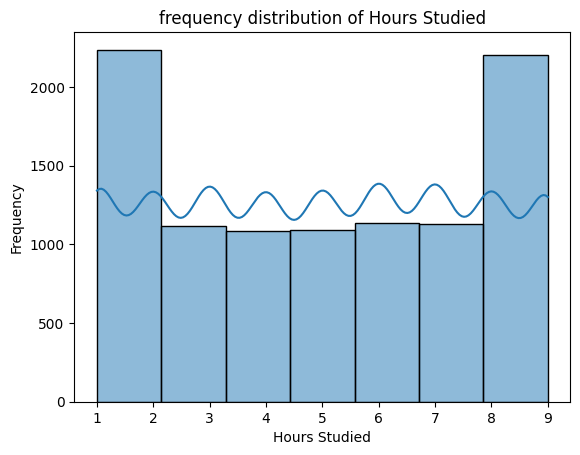

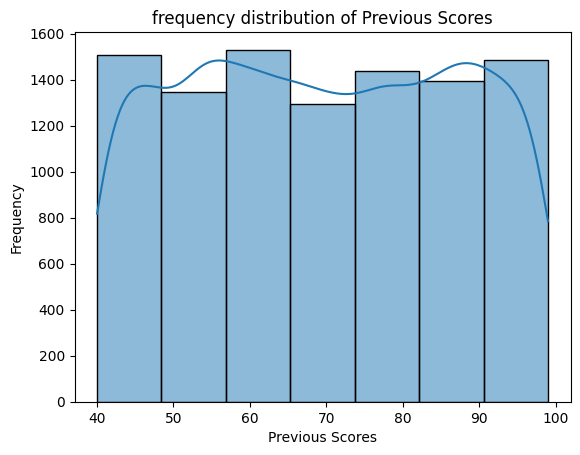

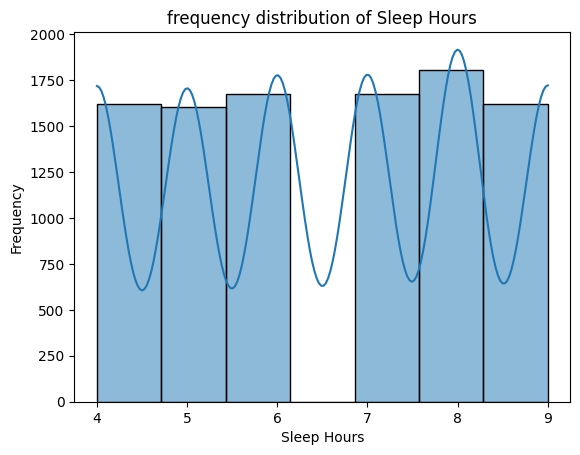

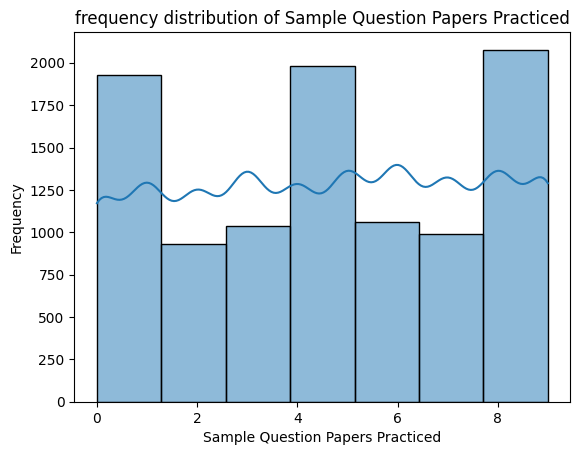

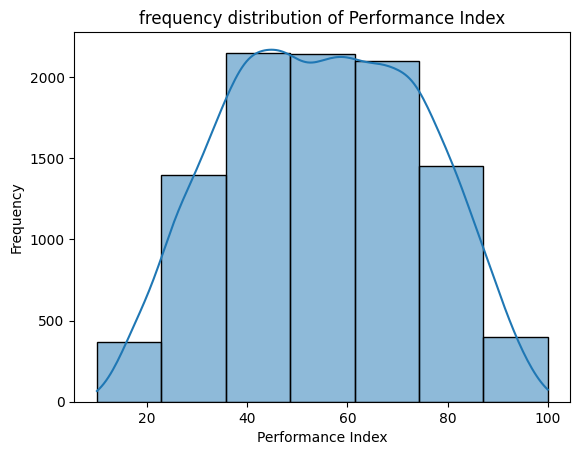

In [8]:
for col in continious_variable:
    sns.histplot(data[col], kde = True, bins = 7)
    plt.title(f"frequency distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

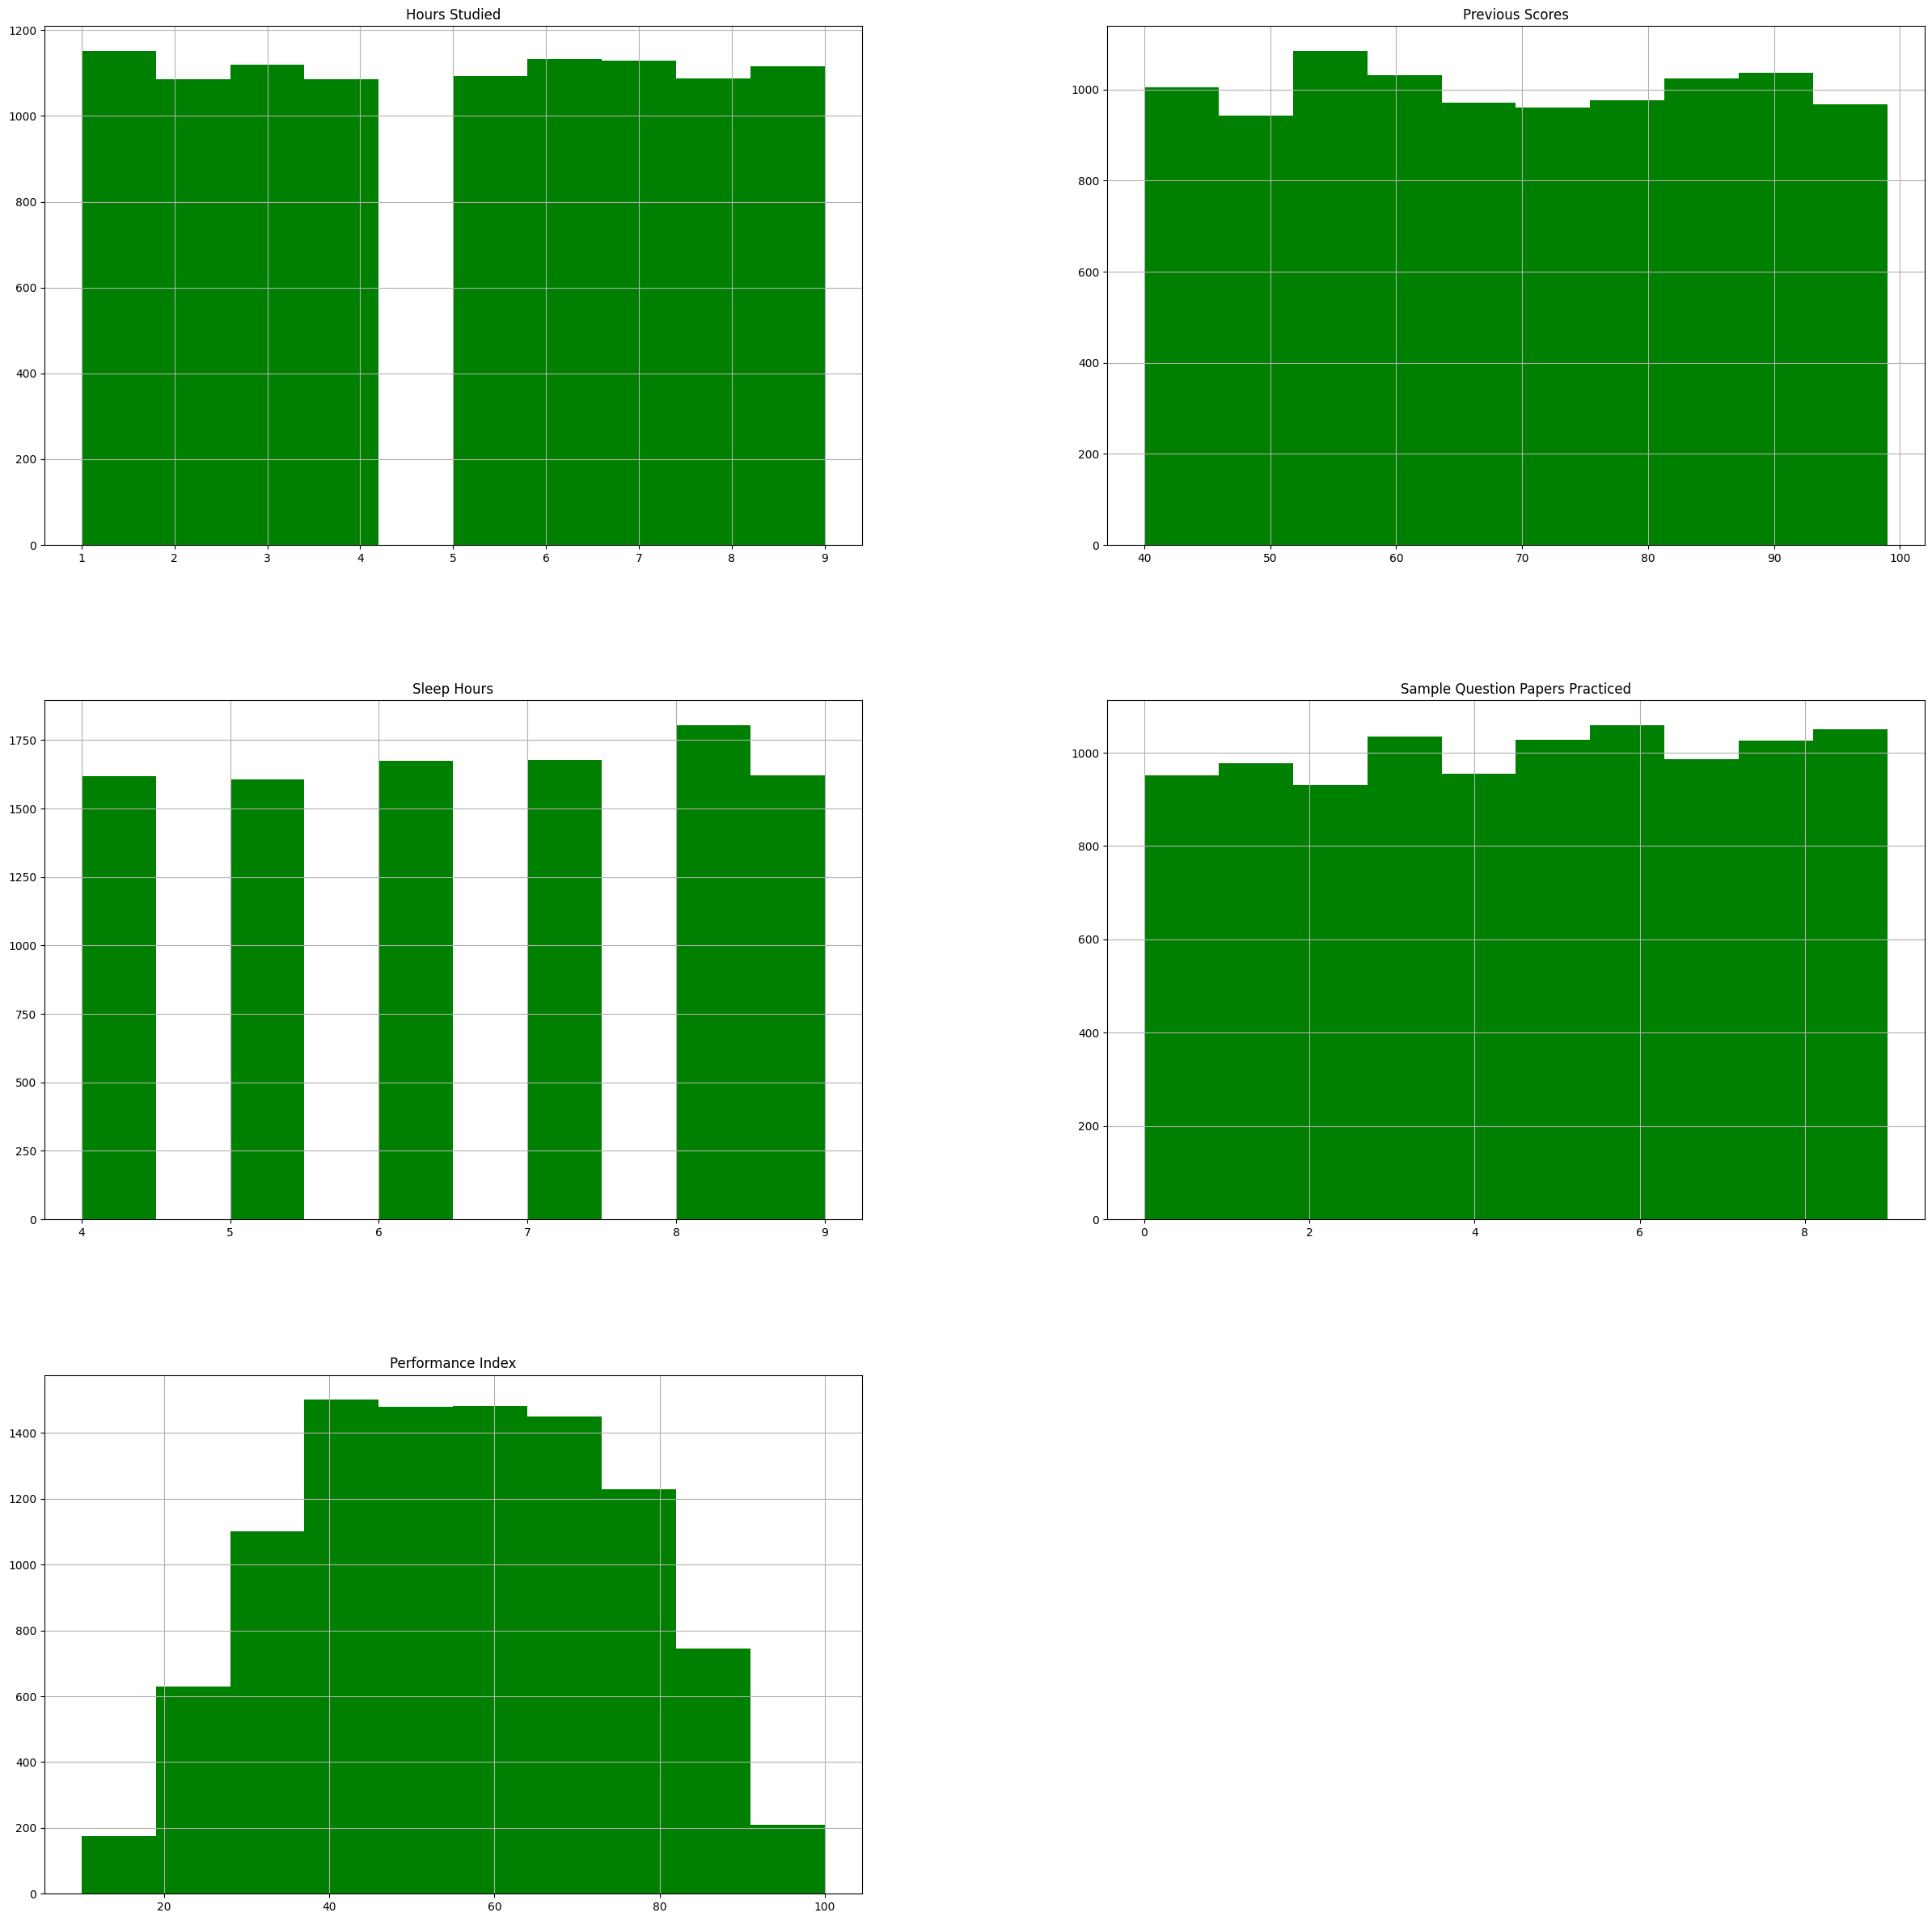

In [9]:
# Visualizing the whole dataframe by plotting Histogram
data.hist(bins = 10, figsize = (30, 30), color = "green")
plt.show()

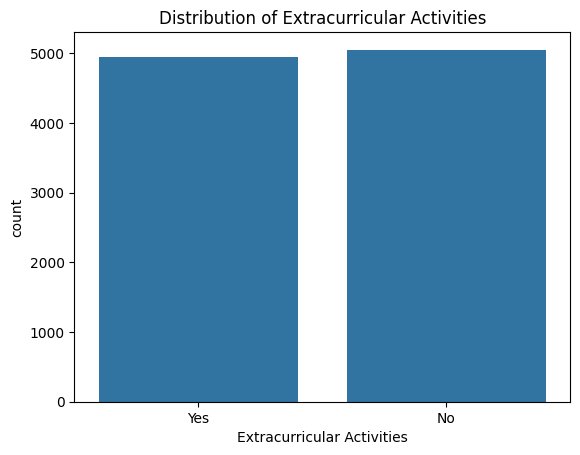

In [10]:
# Bar plot for categorical Variable
sns.countplot(x = "Extracurricular Activities", data = data)
plt.title("Distribution of Extracurricular Activities")
plt.show()

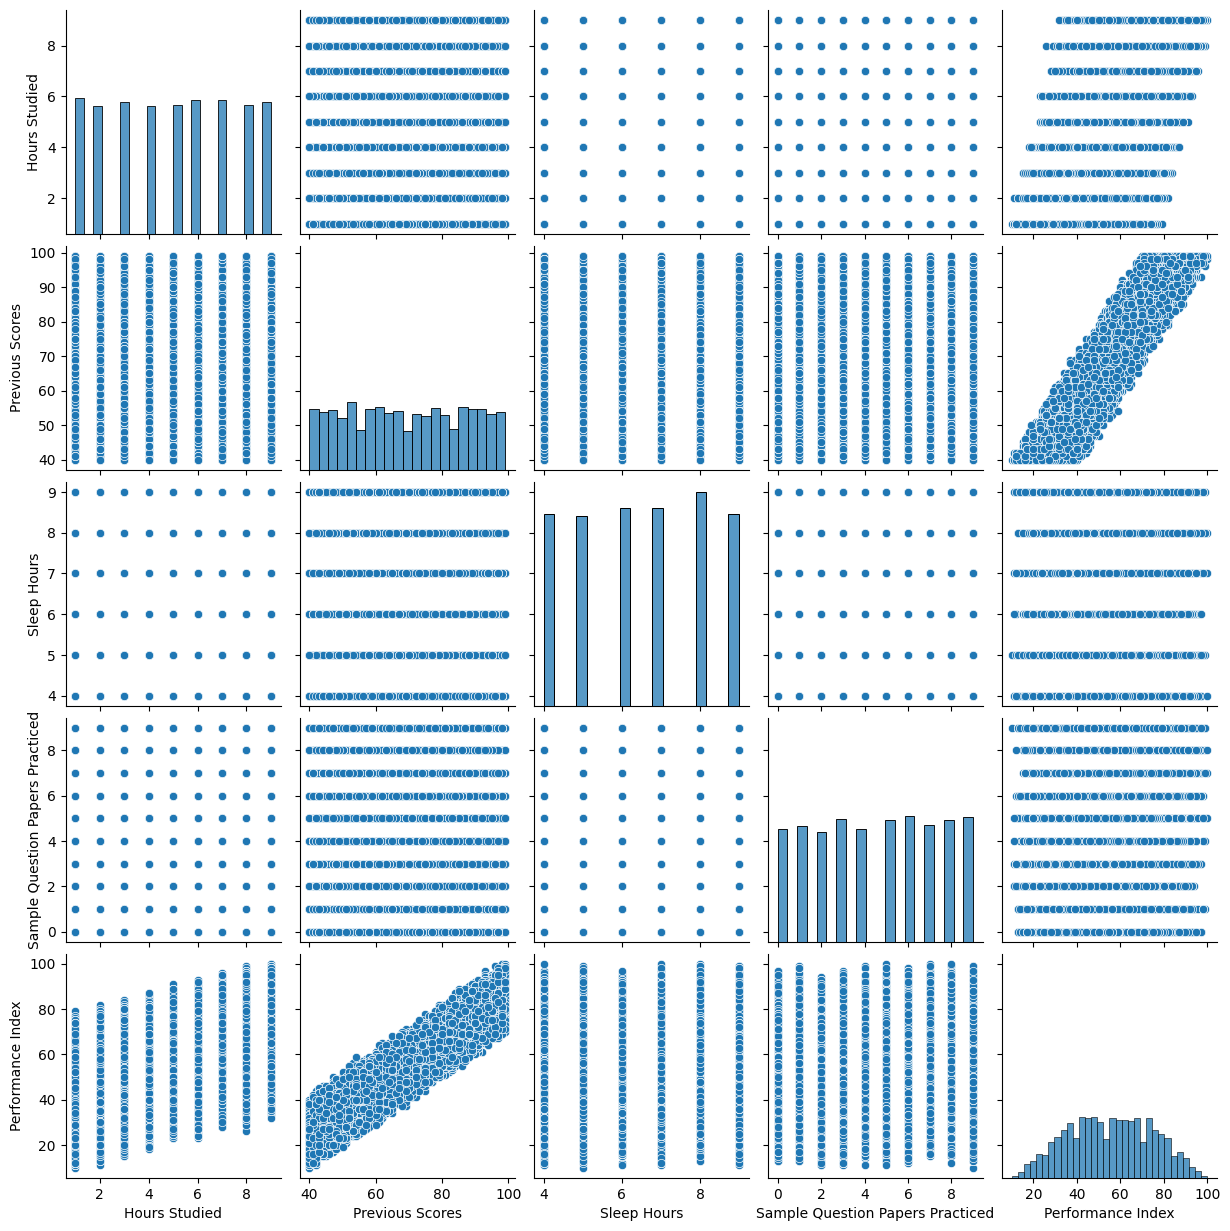

In [11]:
# pair plot for continious Variable
sns.pairplot(data = data[continious_variable])
plt.show()

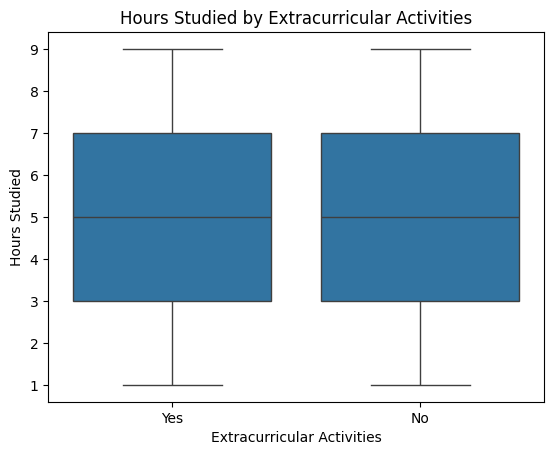

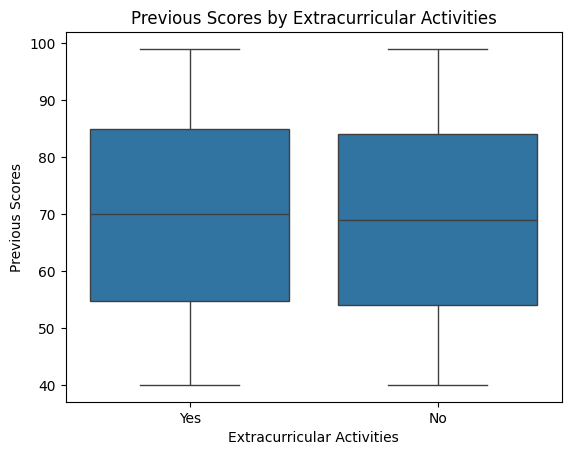

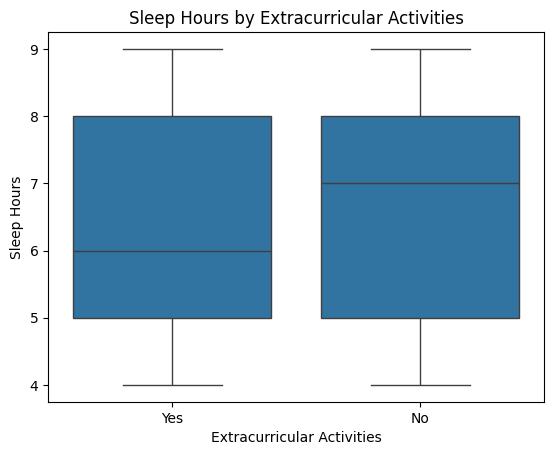

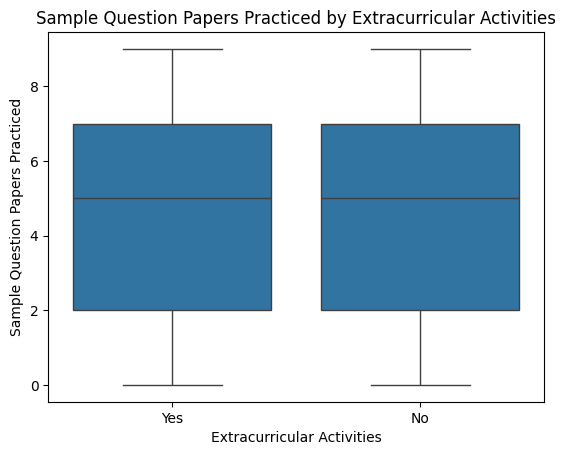

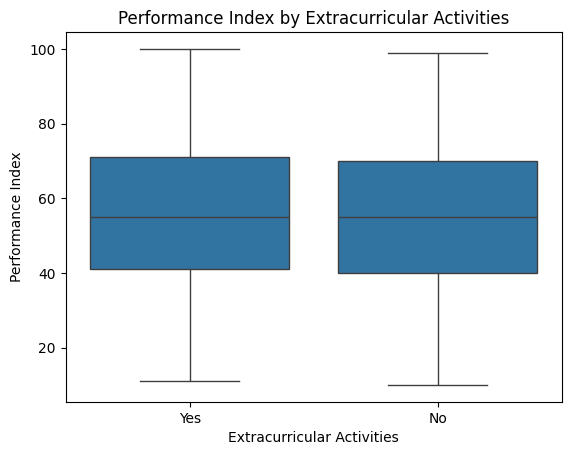

In [12]:
# Box plot to compare continious variable
for col in continious_variable:
    sns.boxplot(x = "Extracurricular Activities", y = col, data = data)
    plt.title(f"{col} by Extracurricular Activities")
    plt.show()

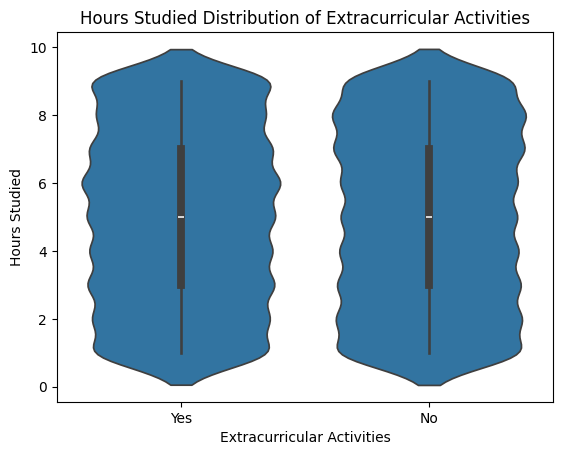

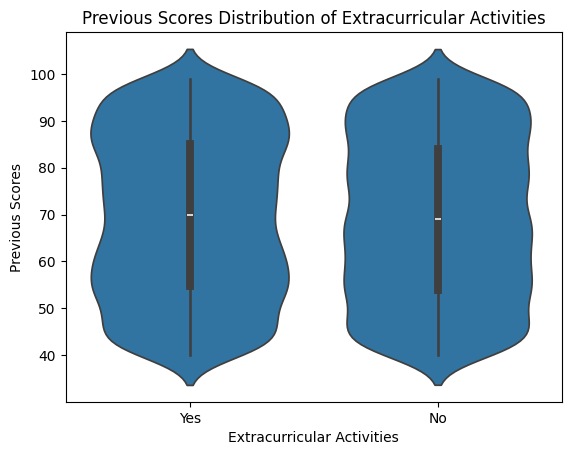

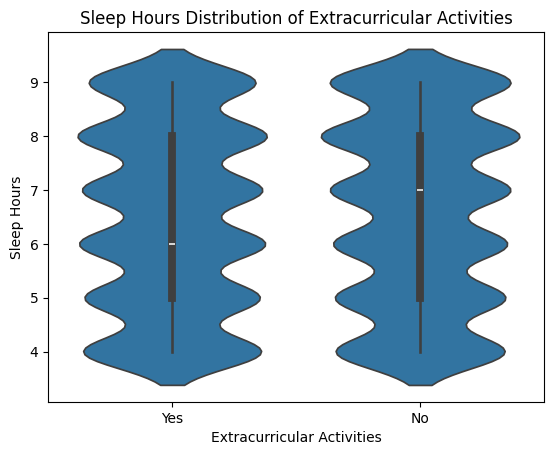

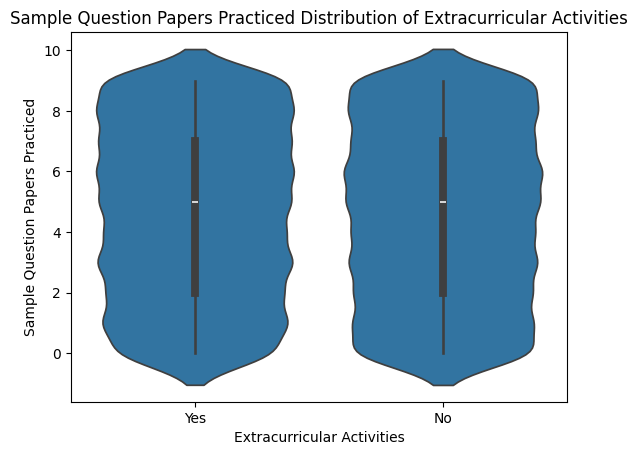

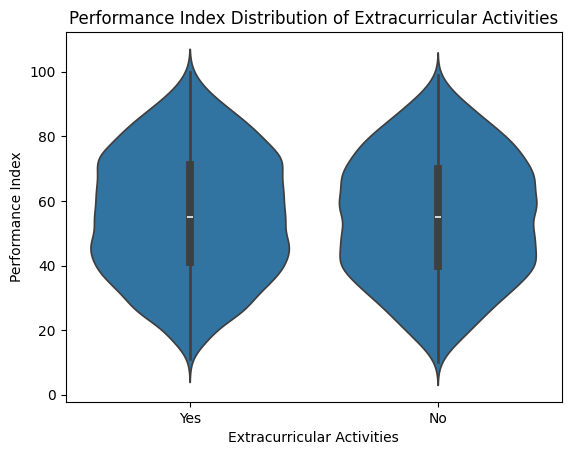

In [13]:
# Distribution and Density of Continious Variable
for col in continious_variable:
    sns.violinplot(x = "Extracurricular Activities", y = col, data = data)
    plt.title(f"{col} Distribution of Extracurricular Activities")
    plt.show()

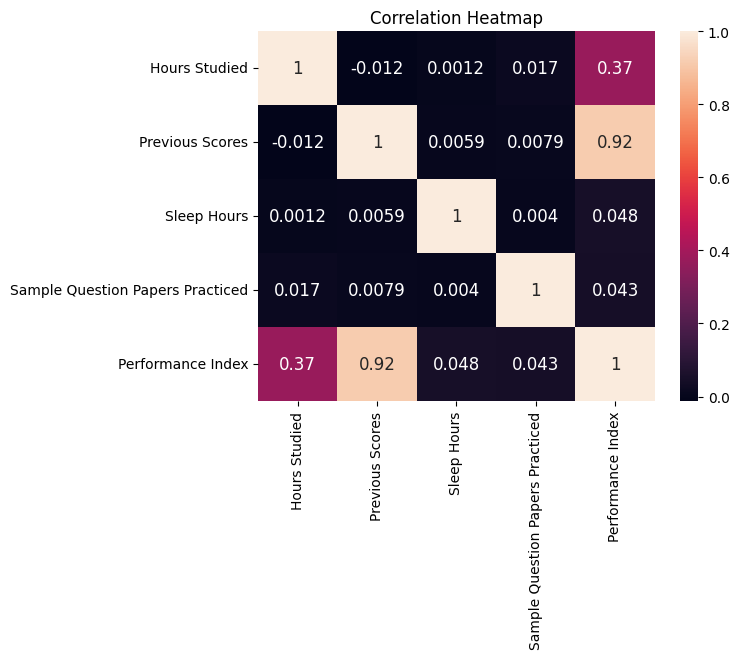

In [14]:
# Correlation Between Continious Variable
correlation = data[continious_variable].corr()
sns.heatmap(correlation, annot= True, annot_kws = {"size" : 12})
plt.title("Correlation Heatmap")
plt.show()

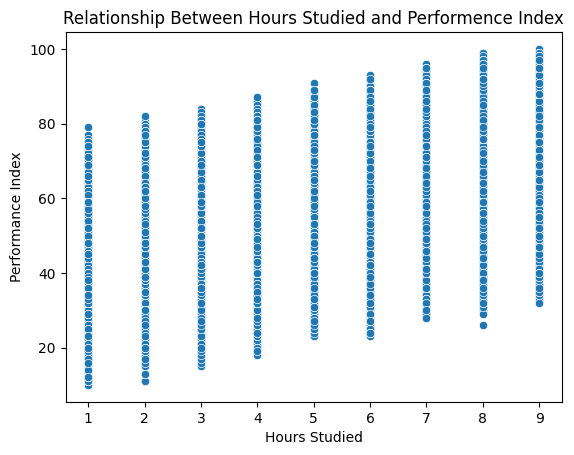

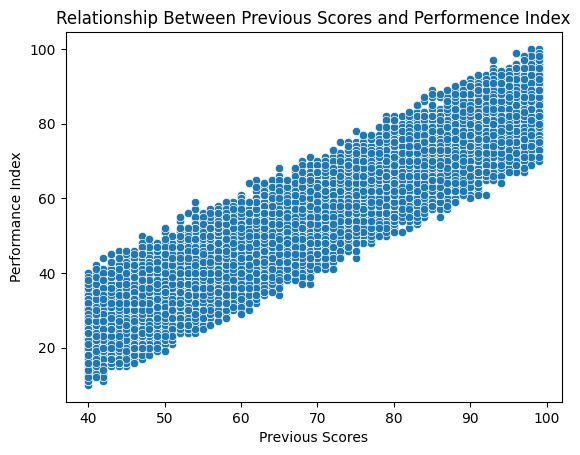

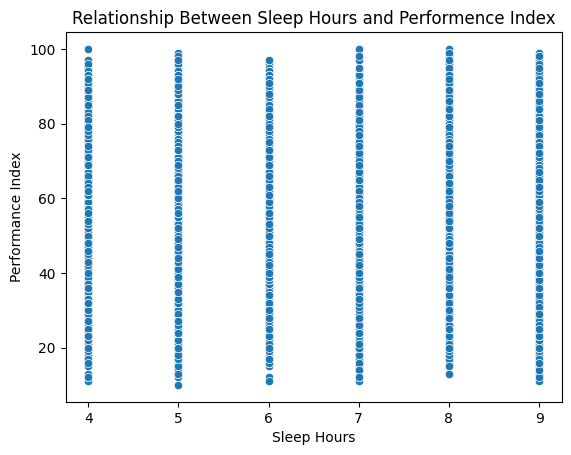

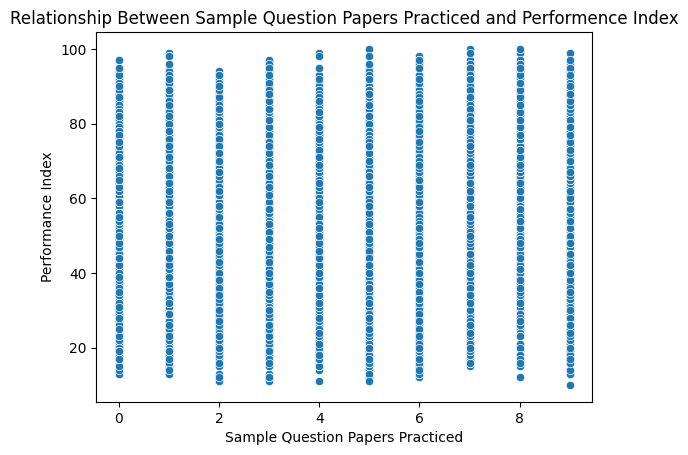

In [15]:
# Data Relationship
for col in continious_variable[:-1]:
    sns.scatterplot(x = data[col], y = data["Performance Index"])
    plt.title(f"Relationship Between {col} and Performence Index")
    plt.show()


# Load Tools

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
# Encoding Categorical Columns
encoder = LabelEncoder()
data["Extracurricular Activities"] = encoder.fit_transform(data["Extracurricular Activities"])

In [18]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [19]:
# Splitting data into Training And testing Data 
x = data.iloc[:,:-1]
y = data["Performance Index"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
# scalling X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
# Fitting the data to model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [23]:
y_pred = model.predict(X_test)

In [24]:
# Creating a new DataFrame to for Actual and Predicted Value for Bias,
new_dataframe = pd.DataFrame({
    "Actual Value" : y_test,
    "Predicted Value" : y_pred,
    # "Error" : y_test - y_pred
})
new_dataframe

,Actual Value,Predicted Value
6252,51.0,55.074827
4684,20.0,22.850402
1731,46.0,48.314699
4742,28.0,31.669067
4521,41.0,43.401572
...,...,...
6412,45.0,47.150277
8285,66.0,63.035449
7853,16.0,17.048580
1095,65.0,63.639524


In [25]:
# calculating mean squarred error and r2_score to evalute model
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squarred Error is : ", mse)
print("R2_Score Accuracy is : ", score)

Mean Squarred Error is :  4.267922744275176
R2_Score Accuracy is :  0.9884832861331776


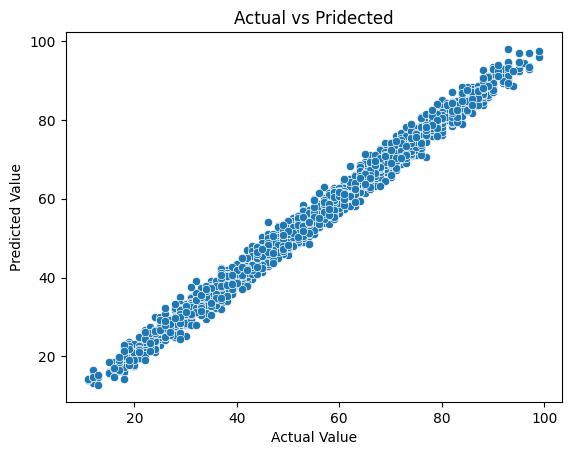

In [26]:
# visualing the results of model
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Pridected")
plt.show()

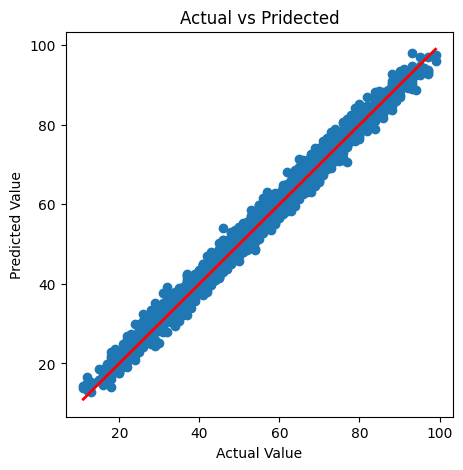

In [27]:
# visualizing along with a line
plt.figure(figsize = (5, 5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", linewidth = 2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Pridected")
plt.show()

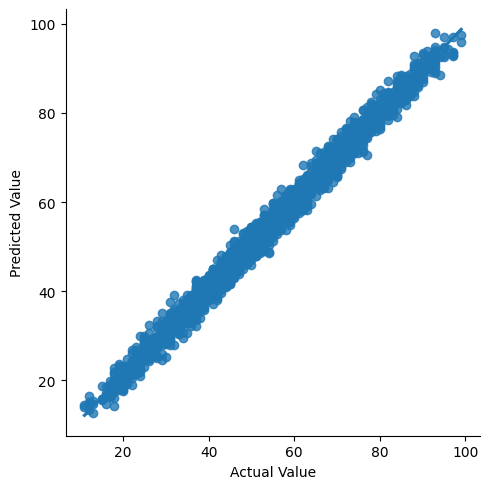

In [32]:
sns.lmplot(x = "Actual Value", y = "Predicted Value", data = new_dataframe)